In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polynomialPhase(coeffs:list,t:int)->int:
    """
    Generate the polynomial phase 
    """
    total = 0
    for i in range(1,len(coeffs)+1):
        total += coeffs[i-1]*(t**i/math.factorial(i))
    return total

In [3]:
def chirp(coeffs:list,nS:int,f:int)->list:
    """
    Generate a sample chirp given coeffs, number of samples and frequency 
    """
    outer = []
    for n in range (0,nS-1):
        temp = cmath.exp(2j*math.pi*(polynomialPhase(coeffs,n/f)))
        outer.append(temp)
    return outer

In [4]:
nSamples = 10000
samplingFrequency = 2000
p = chirp([0,1],nSamples,samplingFrequency)

In [5]:
points = [i.real for i in p]

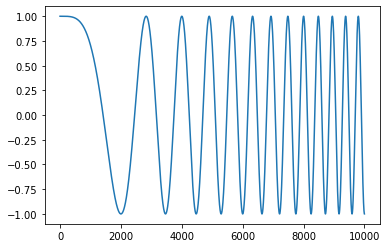

In [6]:
plt.plot(points)

In [7]:
def complexWhiteNoise(nS:int)->list:
    realDist = np.random.normal(0,1/math.sqrt(2),nS-1)
    imgDist = np.random.normal(0,1/math.sqrt(2),nS-1)
    imgDist = [complex(i,1) for i in imgDist]
    return realDist + imgDist

In [66]:
snr = 10
whiteNoisePoints = complexWhiteNoise(nSamples)/(10**(snr/20))
noisyPoints = p + whiteNoisePoints

C:\Users\omari\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


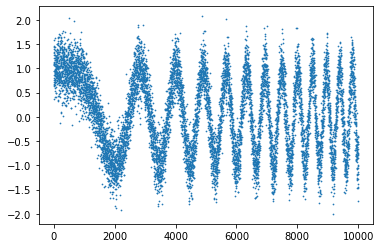

In [67]:
plt.scatter(range(0,len(noisyPoints)),noisyPoints,s=0.5)

In [68]:
def normalize(v:list)->list:
    denominator = 0 
    for i in v:
        denominator += i**2
    print(denominator)
    return [i/math.sqrt(abs(denominator)) for i in v]

In [69]:
def normalizedMF(signal:int,template:list)->list:
    return np.correlate(normalize(signal),normalize((template)),mode="full")

In [70]:
plot_n = normalizedMF(noisyPoints,points)

(49.45616518427022+936.311421731319j)
5248.949593798115


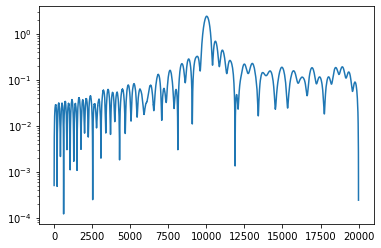

In [71]:
plt.plot([abs(i) for i in plot_n])
plt.yscale("log")